<a href="https://colab.research.google.com/github/DorSkoler/Mnist-ML/blob/main/MnistModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

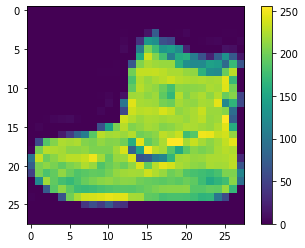

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

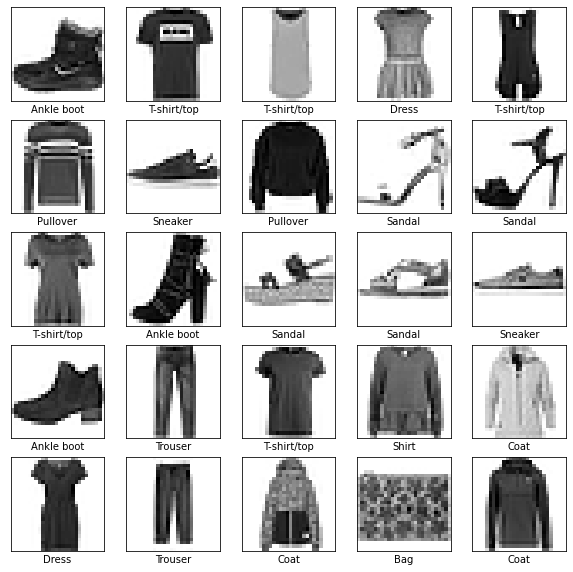

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4972 - accuracy: 0.8230
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3751 - accuracy: 0.8639
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3351 - accuracy: 0.8764
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3123 - accuracy: 0.8842
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.8907
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8964
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2698 - accuracy: 0.9000
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2575 - accuracy: 0.9042
Epoch 9/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2490 - accuracy: 0.9056
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3428 - accuracy: 0.8884 - 539ms/epoch - 2ms/step

Test accuracy: 0.8884000182151794


In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

In [24]:
predictions[0]

array([1.4564763e-09, 1.7299777e-13, 9.5373279e-11, 1.5871233e-13,
       5.5857787e-13, 1.1656369e-05, 5.6762484e-11, 2.2018352e-03,
       1.8515996e-10, 9.9778652e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

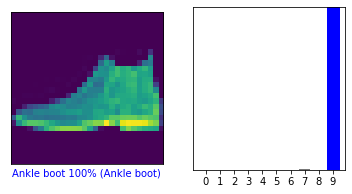

In [332]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[0], test_images[0])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels[0])
plt.show()

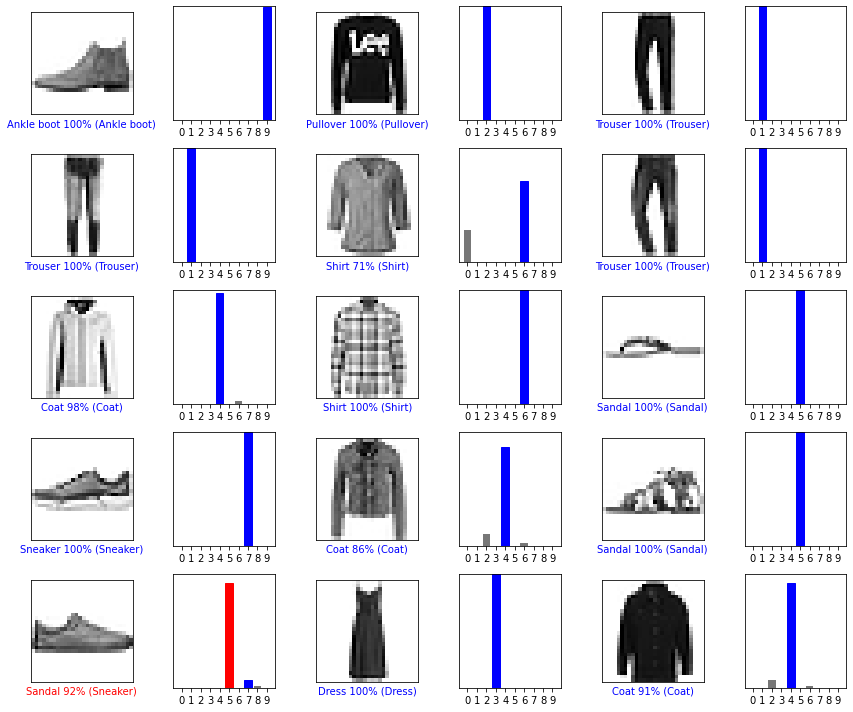

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [373]:
from PIL import Image, ImageFilter
from numpy import asarray
import cv2 as cv

img = cv.imread("/content/images/shoe4.jpg", cv.IMREAD_GRAYSCALE)
img = cv.resize(img,(28,28))
img = img.astype('float32')
img = img.reshape(1,28,28)
img = 255 - img
img /= 255 
img.shape

(1, 28, 28)

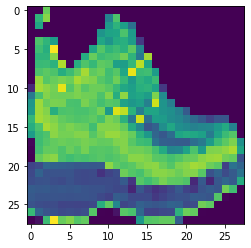

In [374]:
plt.imshow(img[0])

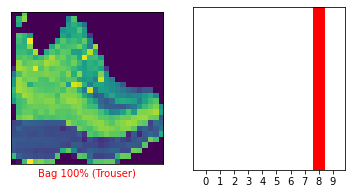

In [375]:
def plot_image(i, predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

predictions2 = probability_model.predict(img)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[0], 1, img[0])
plt.subplot(1,2,2)
plot_value_array(i, predictions2[0],  1)
plt.show()